# Exploratory analysis of seasonal timeseries

In [19]:
source('../NMEG_utils/r_functions/load_nmeg.r')
library(ggplot2)

mpj <- daily_to_xts(get_daily_file('Mpj', 'aflx', make_new=FALSE))
mpj_s <- daily_to_xts(get_daily_file('Mpj', 'soilmet', make_new=FALSE))

head(mpj)

ERROR: Error in file(file, "rt"): invalid 'description' argument


           GPP_g_int RECO_g_int  FC_F_g_int ET_mm_24hint_0 P_F_sum   TA_F_avg
2008-01-01 0.7801624  0.7630259 -0.01713650      0.3889145 0.00000 -6.8149389
2008-01-02 0.8874377  0.8523381 -0.03509953      0.3283609 0.00000 -3.7352119
2008-01-03 0.7399660  0.7671620  0.02719598      0.2930920 0.00000 -0.2215304
2008-01-04 0.4765313  0.5140788  0.03754754      0.1464250 0.00000  2.8862279
2008-01-05 0.2937063  0.5957370  0.30203077      0.2076932 0.00000  5.2494256
2008-01-06 0.6186638  0.5697245 -0.04893923      0.2676718 0.90069  3.6905300
           RH_F_avg SW_IN_F_avg RNET_F_avg VPD_F_avg  TA_F_min VPD_F_min
2008-01-01 23.07702   164.87589         NA 0.2950942 -12.19151  0.161228
2008-01-02 38.74522   100.85973         NA 0.2926247  -6.98115  0.195523
2008-01-03 38.35478   139.49342         NA 0.3891233  -5.25620  0.228244
2008-01-04 57.74541   139.01638         NA 0.3222331  -0.16010  0.142429
2008-01-05 63.67989    80.18286         NA 0.3345487   1.62348  0.116569
2008-01-06 76.18

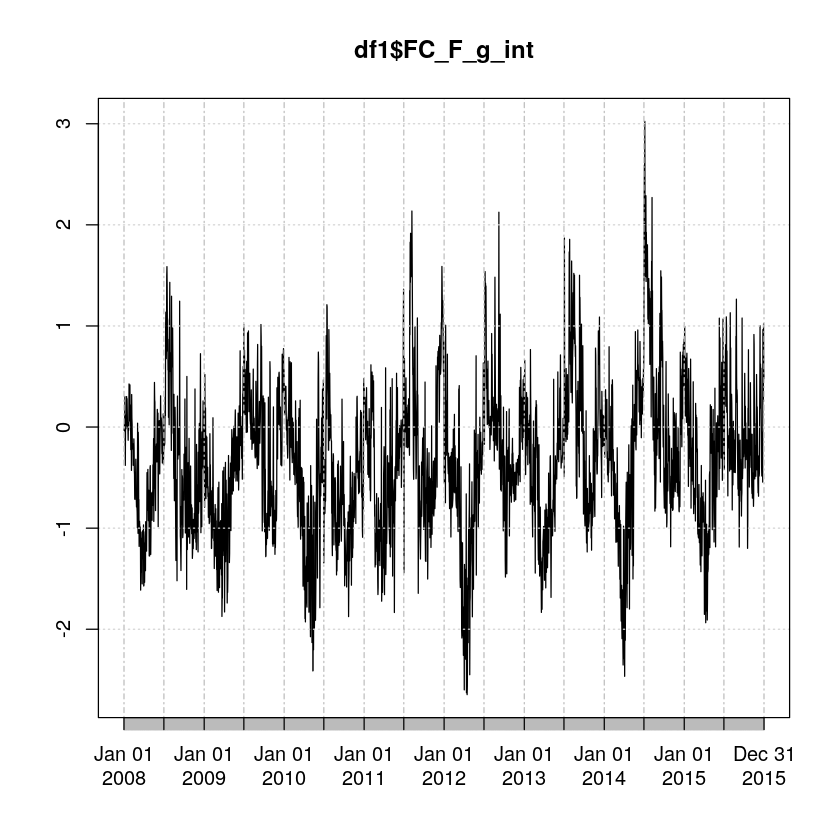

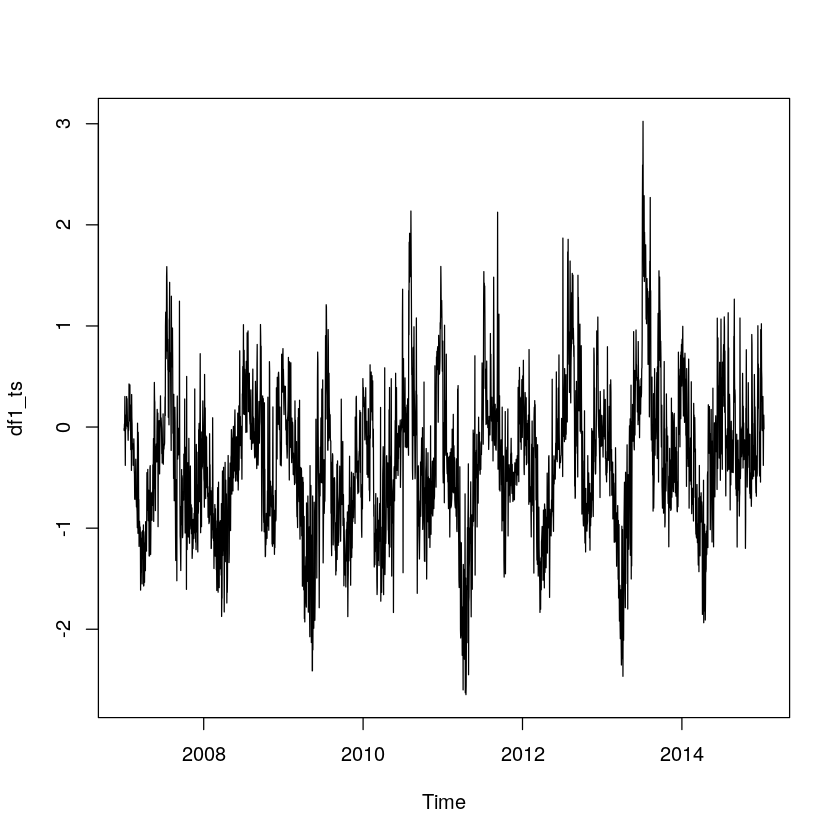

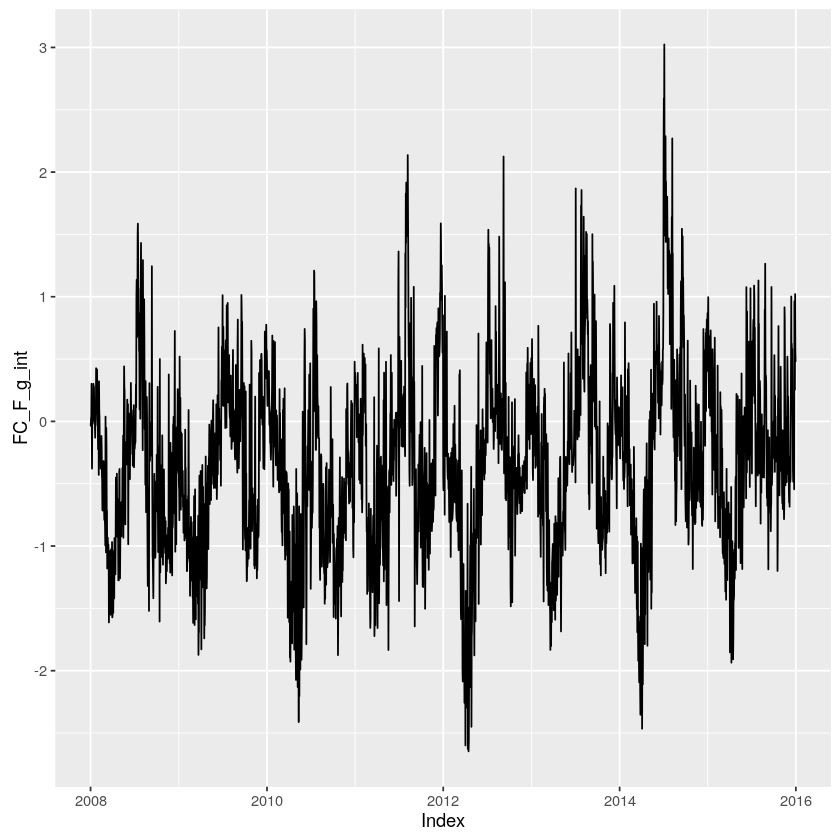

In [20]:
df1 <- mpj
# Different time series objects have different plotting methods (but "plot(...)" should work for any):
# 1. Plot the xts
plot.xts(df1$FC_F_g_int)
# 2. Convert to a ts object and plot
df1_ts<-ts(df1$FC_F_g_int, frequency = 365, start = c(2007, 1, 1),end = c(2015, 12, 31))
plot.ts(df1_ts)
# or in ggplot2
ggplot(df1, aes(x=Index, y=FC_F_g_int)) + geom_line()

## Decomposition methods

### Simple moving average

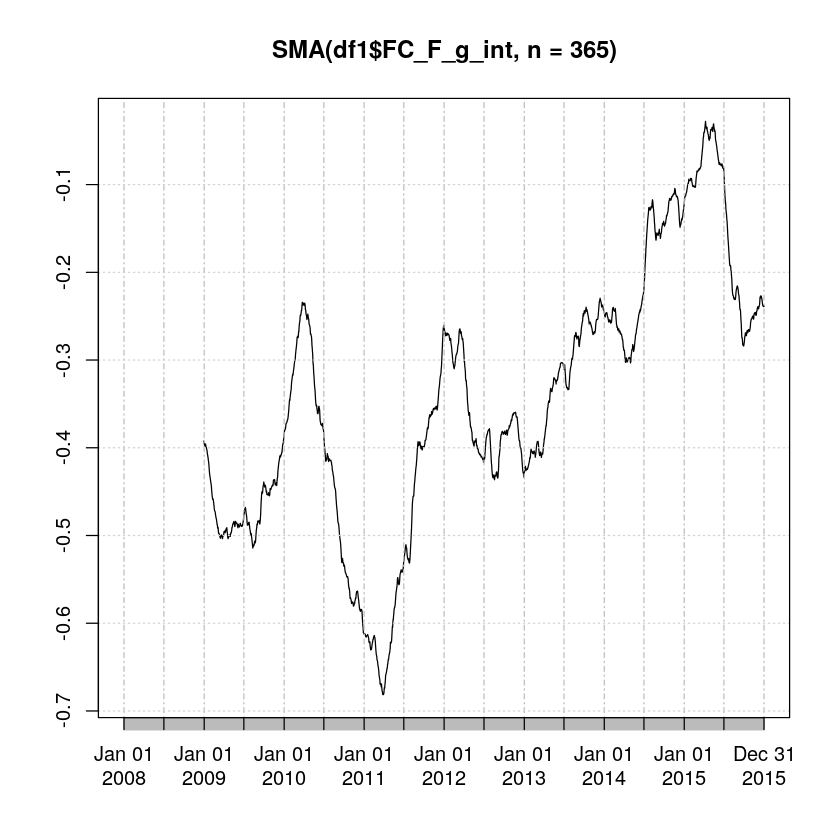

In [21]:
# Plot 1 year moving average with SMA
library("TTR")
plot(SMA(df1$FC_F_g_int,n=365))

### Full additive decomposition

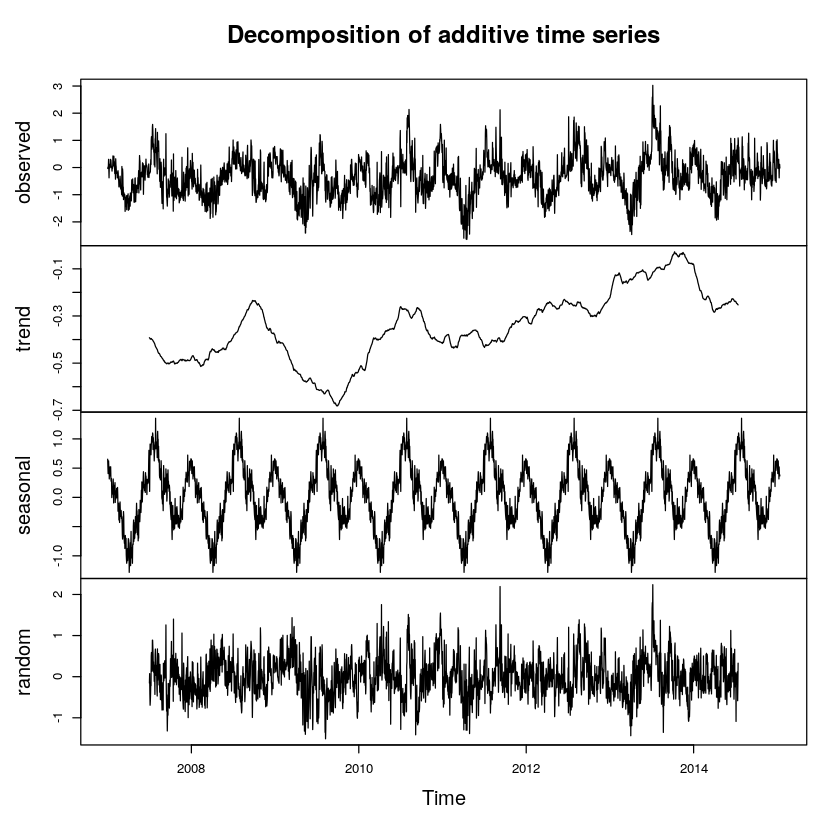

Loading required package: timeDate
This is forecast 6.2 



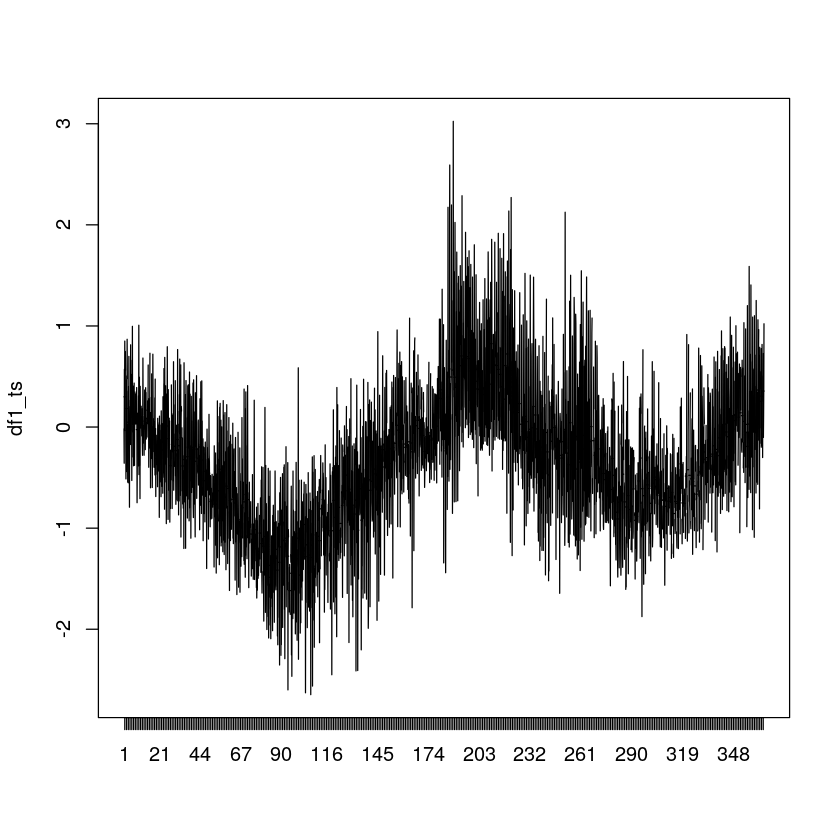

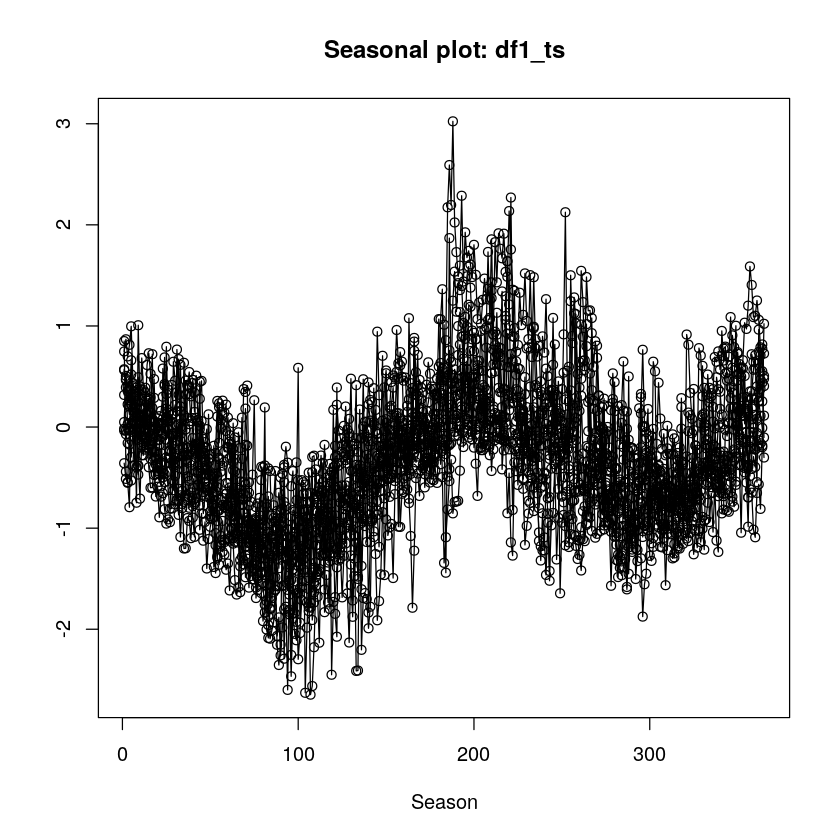

In [22]:
#Decomposition methods for seasonality
df1_ts_decomp<-decompose(df1_ts)
plot(df1_ts_decomp)
monthplot(df1_ts)
library(forecast)
seasonplot(df1_ts) 

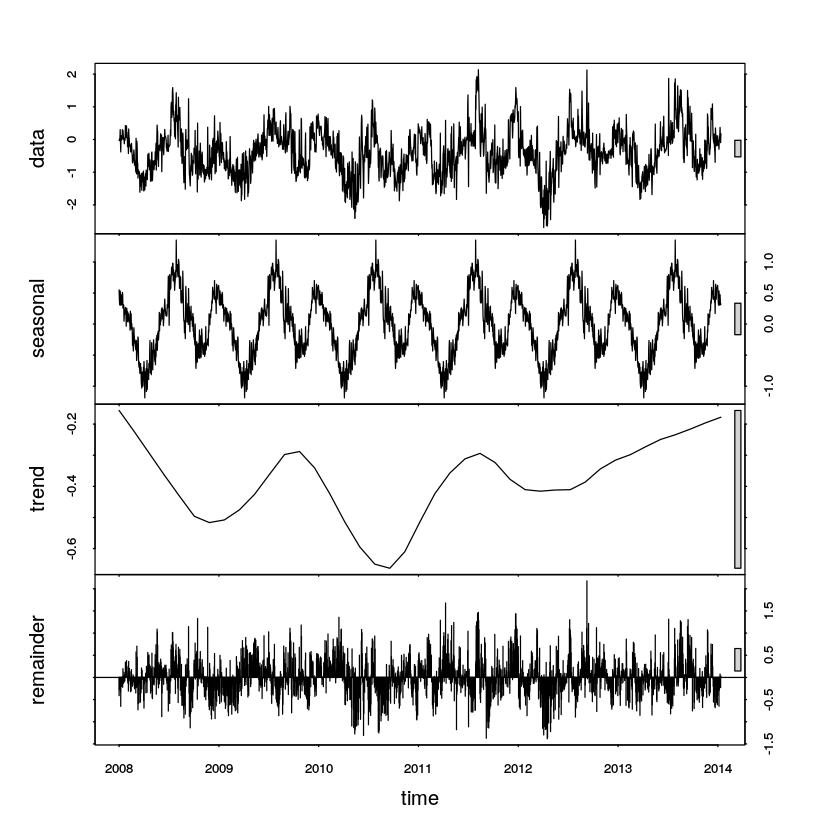

In [7]:
# seasonal decomposition using loess
sdFC <- stl(df1_ts, s.window="period", na.action=na.omit)
plot(sdFC)

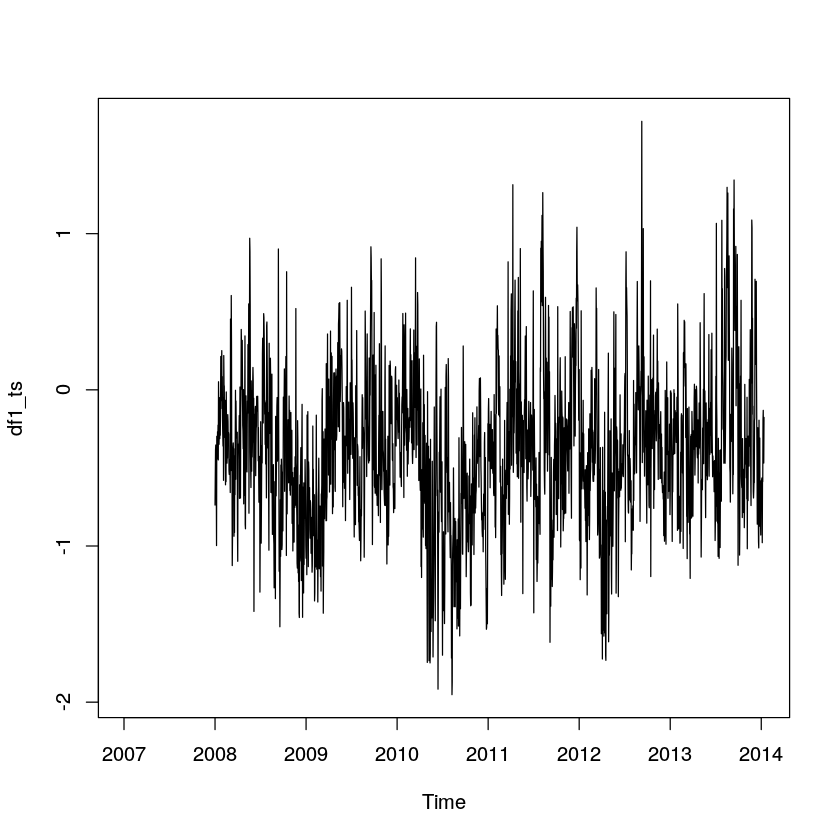

In [8]:
seasonalADJ<-df1_ts - d_df1_ts$seasonal
plot(seasonalADJ)

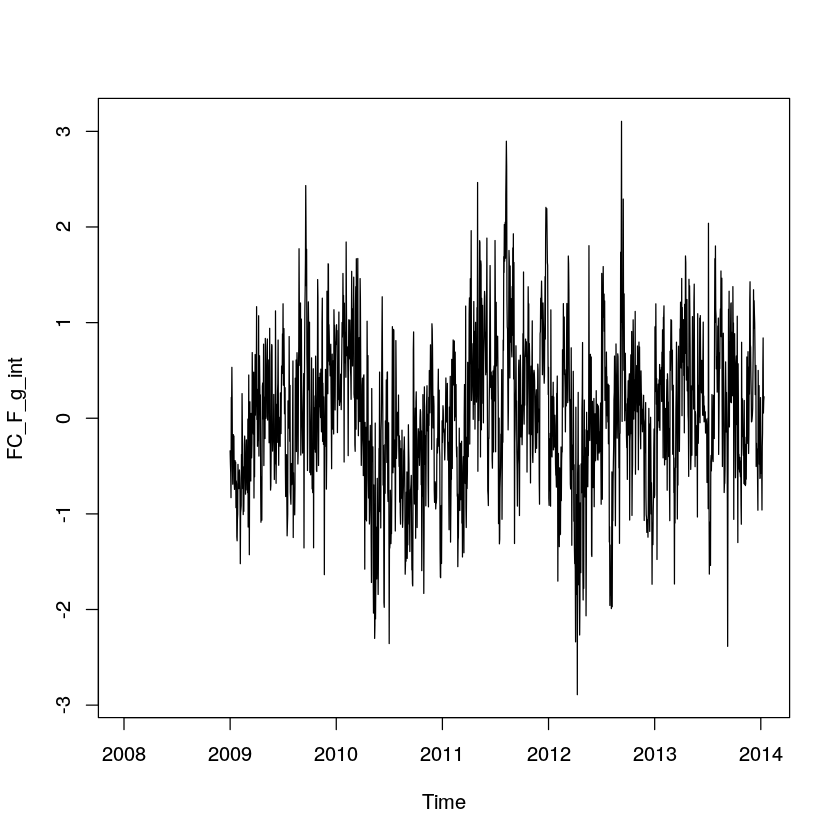

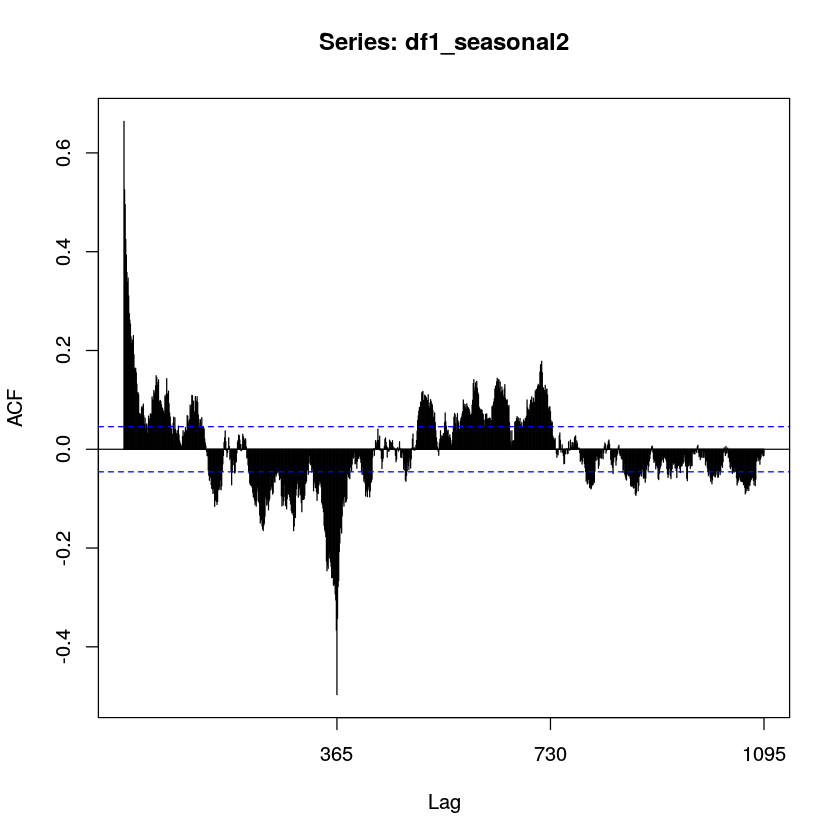

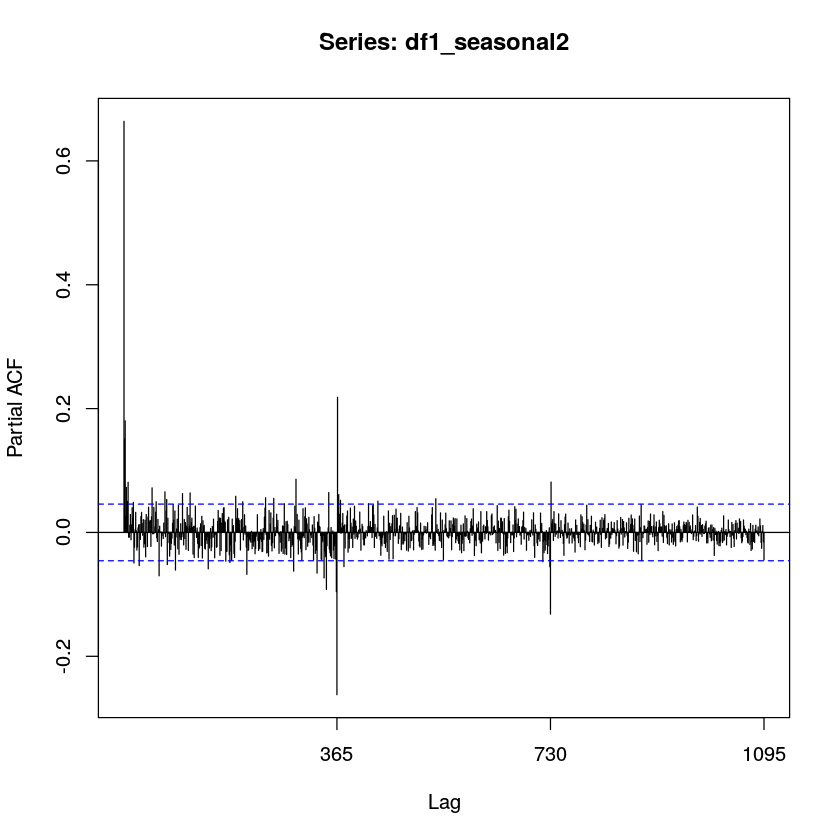

In [9]:
# an alternative way to adjust for seasonal differences
df1_seasonal2<-diff(df1_ts, 365)
plot(df1_seasonal2)
Acf(df1_seasonal2,lag.max=3*365)
Pacf(df1_seasonal2,lag.max=3*365)

In [10]:
# 1) Test for stationarity
# Augemented Dickey-Fuller Test
# A significant p-value means that no unit root is present (no need for differencing)
# Rejecting the null hypothesis suggests that a time series as stationary (from the tseries package)
library(tseries)
sum(is.na(df1_ts))
adf.test(df1_ts[366:nrow(df1_ts)])
ndiffs(df1_ts)
nsdiffs(df1_ts)

[1] 365

Warning message:
In adf.test(df1_ts[366:nrow(df1_ts)]): p-value smaller than printed p-value


	Augmented Dickey-Fuller Test

data:  df1_ts[366:nrow(df1_ts)]
Dickey-Fuller = -5.452, Lag order = 13, p-value = 0.01
alternative hypothesis: stationary


[1] 0

[1] 0

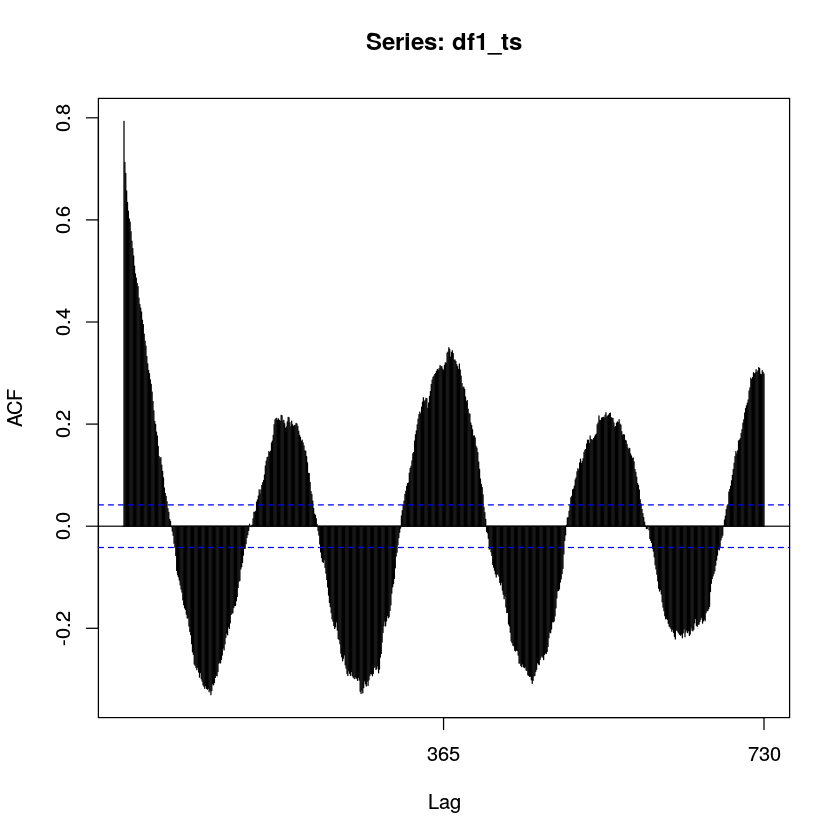

In [11]:
Acf(df1_ts,lag.max=2*365)
#Acf(df1_ts,lag.max=2*365,plot=FALSE) # this prints out the autocorrelation values


Call:
arima(x = df1_ts, order = c(0, 0, 0), seasonal = list(order = c(0, 1, 0), period = 365))


sigma^2 estimated as 0.6216:  log likelihood = -2169.84,  aic = 4341.68

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE     MASE
Training set 0.02420953 0.7200977 0.5170202 3.610055 428.9583 1.614506
                  ACF1
Training set 0.6640237


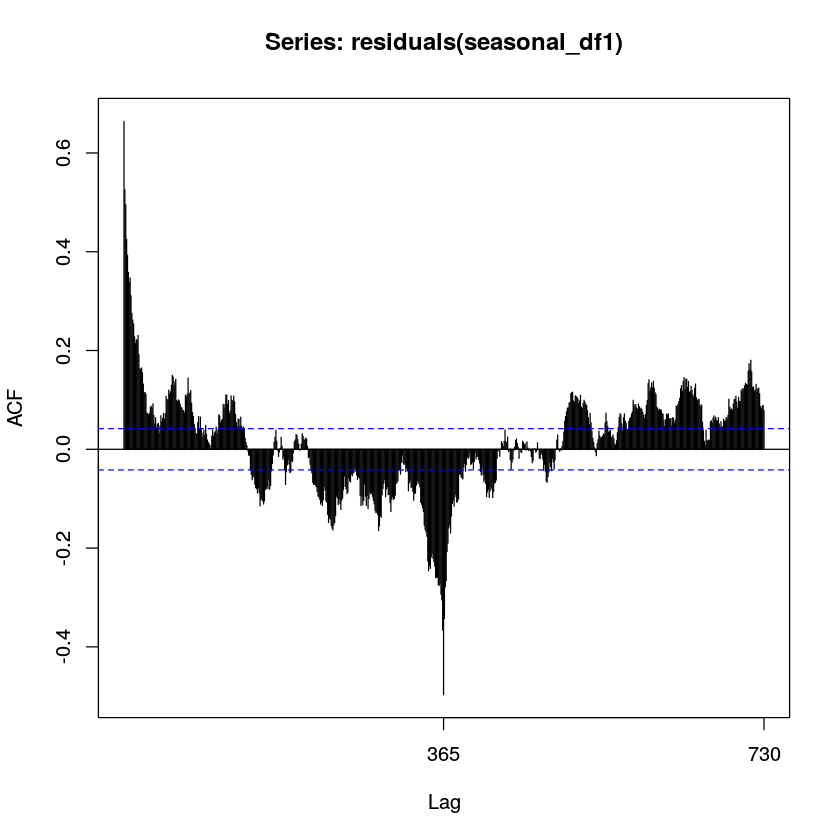

In [12]:
seasonal_df1<-arima(df1_ts,order=c(0,0,0),
                   seasonal=list(order=c(0,1,0),period=365))
res_df1<-(residuals(seasonal_df1))
Acf(residuals(seasonal_df1))
summary(seasonal_df1)